In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np

weighted_0125 = pandas.read_csv("results/log_0_ResNet18_weighted_0.125.csv")
weighted_025 = pandas.read_csv("results/log_0_ResNet18_weighted_0.25.csv")
weighted_05 = pandas.read_csv("results/log_0_ResNet18_weighted_0.5.csv")
weighted_1 = pandas.read_csv("results/log_0_ResNet18_weighted_1.csv")
weighted_2 = pandas.read_csv("results/log_0_ResNet18_weighted_2.csv")
weighted_4 = pandas.read_csv("results/log_0_ResNet18_weighted_4.csv")
weighted_8 = pandas.read_csv("results/log_0_ResNet18_weighted_8.csv")
standard = pandas.read_csv("results/log_0_ResNet18_standard_1.0.csv")
erm = pandas.read_csv("results/log_0_ResNet18_erm_1.0.csv")

weighted_0125["params"] = "weighted_0125"
weighted_025["params"] = "weighted_025"
weighted_05["params"] = "weighted_05"
weighted_1["params"] = "weighted_1"
weighted_2["params"] = "weighted_2"
weighted_4["params"] = "weighted_4"
weighted_8["params"] = "weighted_8"
standard["params"] = "standard"
erm["params"] = "erm"


df = pandas.concat(
    [
        weighted_0125,
        weighted_025,
        weighted_05,
        weighted_1,
        weighted_2,
        weighted_4,
        weighted_8,
        standard,
        erm,
    ]
)
df["train acc"] = df["train acc"] / 100
df["test acc"] = df["test acc"] / 100

In [2]:
print("Best test accuracy")
print(df.groupby("params")["test acc"].max().sort_values(ascending=False))

Best test accuracy
params
weighted_1       0.9452
weighted_0125    0.9441
weighted_05      0.9428
standard         0.9417
weighted_025     0.9411
weighted_2       0.9397
weighted_4       0.9327
weighted_8       0.9168
erm              0.4885
Name: test acc, dtype: float64


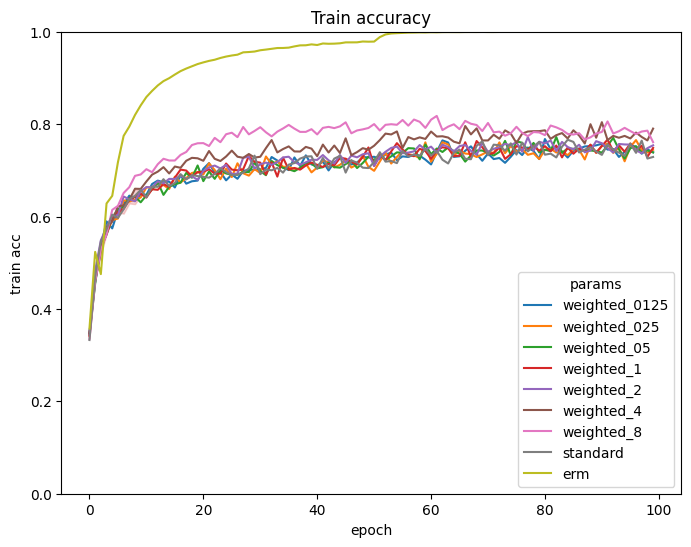

In [3]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="epoch", y="train acc", hue="params")
plt.ylim(0, 1)
plt.title("Train accuracy")
plt.show()

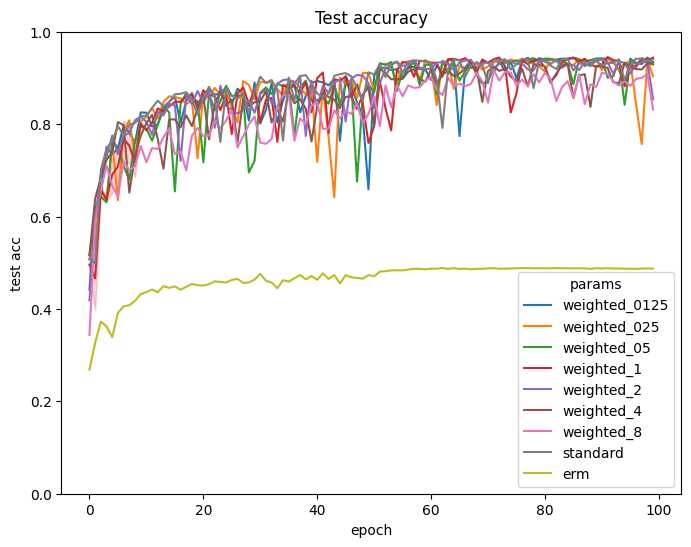

In [4]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="epoch", y="test acc", hue="params")
plt.ylim(0, 1)
plt.title("Test accuracy")
plt.show()

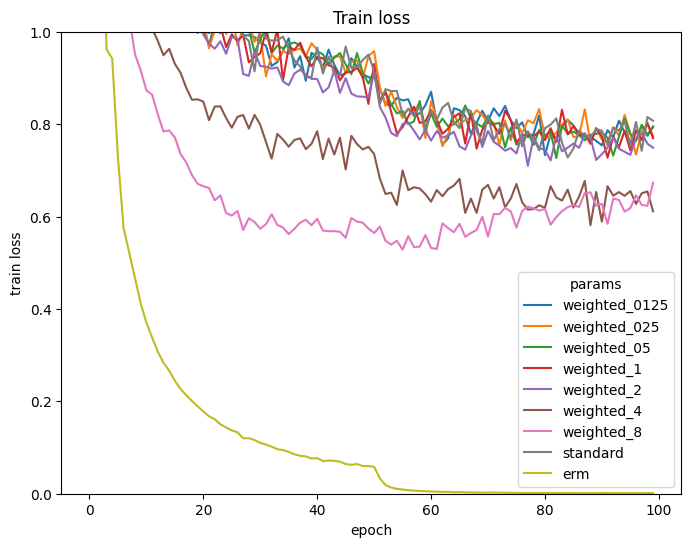

In [5]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="epoch", y="train loss", hue="params")
plt.ylim(0, 1)
plt.title("Train loss")
plt.show()

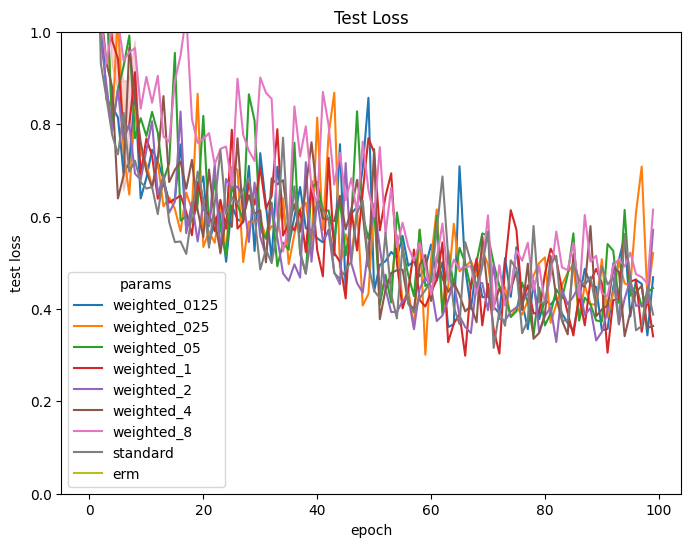

In [6]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="epoch", y="test loss", hue="params")
plt.ylim(0, 1)
plt.title("Test Loss")
plt.show()

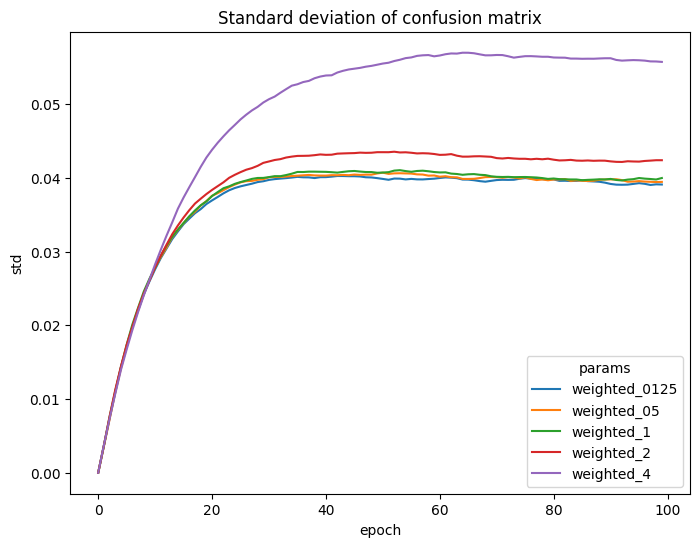

In [7]:
cms_weighted_0125 = torch.load("results/cm_0_ResNet18_weighted_0.125.pt")
cms_weighted_025 = torch.load("results/cm_0_ResNet18_weighted_0.25.pt")
cms_weighted_05 = torch.load("results/cm_0_ResNet18_weighted_0.5.pt")
cms_weighted_1 = torch.load("results/cm_0_ResNet18_weighted_1.pt")
cms_weighted_2 = torch.load("results/cm_0_ResNet18_weighted_2.pt")
cms_weighted_4 = torch.load("results/cm_0_ResNet18_weighted_4.pt")
# cms_weighted_8 = torch.load("results/cm_0_ResNet18_weighted_8.pt")

cms_weighted_0125 = cms_weighted_0125.permute(2, 0, 1).reshape(100, -1).std(dim=1)
cms_weighted_025 = cms_weighted_025.permute(2, 0, 1).reshape(100, -1).std(dim=1)
cms_weighted_05 = cms_weighted_05.permute(2, 0, 1).reshape(100, -1).std(dim=1)
cms_weighted_1 = cms_weighted_1.permute(2, 0, 1).reshape(100, -1).std(dim=1)
cms_weighted_2 = cms_weighted_2.permute(2, 0, 1).reshape(100, -1).std(dim=1)
cms_weighted_4 = cms_weighted_4.permute(2, 0, 1).reshape(100, -1).std(dim=1)
# cms_weighted_8 = cms_weighted_8.permute(2, 0, 1).reshape(100, -1).std(dim=1)

df_cms_weighted_0125 = pandas.DataFrame(
    {"epoch": np.arange(100), "std": cms_weighted_0125, "params": "weighted_0125"}
)
df_cms_weighted_05 = pandas.DataFrame(
    {"epoch": np.arange(100), "std": cms_weighted_05, "params": "weighted_05"}
)
df_cms_weighted_1 = pandas.DataFrame(
    {"epoch": np.arange(100), "std": cms_weighted_1, "params": "weighted_1"}
)
df_cms_weighted_2 = pandas.DataFrame(
    {"epoch": np.arange(100), "std": cms_weighted_2, "params": "weighted_2"}
)
df_cms_weighted_4 = pandas.DataFrame(
    {"epoch": np.arange(100), "std": cms_weighted_4, "params": "weighted_4"}
)
# df_cms_weighted_8 = pandas.DataFrame(
#     {"epoch": np.arange(100), "std": cms_weighted_8, "params": "weighted_8"}
# )

df_cms = pandas.concat(
    [
        df_cms_weighted_0125,
        df_cms_weighted_05,
        df_cms_weighted_1,
        df_cms_weighted_2,
        df_cms_weighted_4,
        # df_cms_weighted_8,
    ]
)

plt.figure(figsize=(8, 6))
sns.lineplot(data=df_cms, x="epoch", y="std", hue="params")
plt.title("Standard deviation of confusion matrix")
plt.show()